### **Importando as bibliotecas**

In [342]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 

### **Carregando os dados** 

In [343]:
etanol11 = pd.read_csv('../Data/precos-gasolina-etanol-11.csv', sep=';')
etanol12 = pd.read_csv('../Data/precos-gasolina-etanol-12.csv', sep=';')



In [344]:
#t_et11 = etanol11.head(100)
#t_et12 = etanol12.head(100)



In [345]:
df = pd.concat([etanol11,etanol12], ignore_index=True)
df.drop(['Cep','CNPJ da Revenda','Valor de Compra','Unidade de Medida','Complemento','Numero Rua','Nome da Rua'], inplace=True, axis='columns')
df = df.reindex(columns=['Regiao - Sigla','Estado - Sigla','Municipio','Bairro','Bandeira','Revenda','Valor de Venda','Produto','Data da Coleta'])
df['Data da Coleta'] = pd.to_datetime(df['Data da Coleta'], format='%d/%m/%Y')
df['Valor de Venda'] = df['Valor de Venda'].str.replace(',', '.').astype(float)

### Removendo "GASOLINA ADITIVADA"

In [346]:
i = df.loc[(df['Produto'] == "GASOLINA ADITIVADA")]
df.drop(i.index, inplace=True) # O .index informa que voce quer a linha, nao a coluna.
df

,Regiao - Sigla,Estado - Sigla,Municipio,Bairro,Bandeira,Revenda,Valor de Venda,Produto,Data da Coleta
0,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,VIBRA,SEVERINO S. LOPES & CIA. LTDA,6.30,GASOLINA,2023-11-01
2,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,VIBRA,SEVERINO S. LOPES & CIA. LTDA,4.88,ETANOL,2023-11-01
3,NE,AL,PALMEIRA DOS INDIOS,VILA MARIA,VIBRA,A. B. LESSA NETO & CIA LTDA,6.19,GASOLINA,2023-11-01
5,NE,AL,PALMEIRA DOS INDIOS,VILA MARIA,VIBRA,A. B. LESSA NETO & CIA LTDA,4.85,ETANOL,2023-11-01
6,NE,AL,PALMEIRA DOS INDIOS,SAO CRISTOVAO,IPIRANGA,POSTO ZÉ TAVARES COMÉRCIO DE COMBUSTÍVEIS LTDA,6.22,GASOLINA,2023-11-01
...,...,...,...,...,...,...,...,...,...
101990,NE,MA,SANTA INES,PARQUE SANTA CRUZ,BRANCA,BARROS & CRUZ RODRIGUES LTDA,4.27,ETANOL,2023-12-29
101991,S,PR,CAMPO LARGO,CENTRO,IPIRANGA,AUTO POSTO IMPERADOR DE CAMPO LARGO LTDA,5.79,GASOLINA,2023-12-29
101992,S,PR,CAMPO LARGO,CENTRO,IPIRANGA,AUTO POSTO IMPERADOR DE CAMPO LARGO LTDA,3.79,ETANOL,2023-12-29
101993,S,RS,OSORIO,CENTRO,RODOIL,POSTO ALDEIAO COMERCIO DE COMBUSTIVEIS LTDA,5.49,GASOLINA,2023-12-29


### Plotando

In [347]:
gp1 = df.groupby(['Data da Coleta','Produto'])['Valor de Venda'].mean()
gp1

Data da Coleta  Produto 
2023-11-01      ETANOL      3.879103
                GASOLINA    5.686607
2023-11-02      ETANOL      3.835196
                GASOLINA    5.628386
2023-11-03      ETANOL      3.974205
                              ...   
2023-12-27      GASOLINA    5.616852
2023-12-28      ETANOL      3.757453
                GASOLINA    5.682149
2023-12-29      ETANOL      3.605207
                GASOLINA    5.578553
Name: Valor de Venda, Length: 86, dtype: float64

In [348]:
df1 = pd.DataFrame(gp1)
df1

Valor de Venda
Data da Coleta Produto                 
2023-11-01     ETANOL          3.879103
               GASOLINA        5.686607
2023-11-02     ETANOL          3.835196
               GASOLINA        5.628386
2023-11-03     ETANOL          3.974205
...                                 ...
2023-12-27     GASOLINA        5.616852
2023-12-28     ETANOL          3.757453
               GASOLINA        5.682149
2023-12-29     ETANOL          3.605207
               GASOLINA        5.578553

[86 rows x 1 columns]

In [349]:
# o filtro do groupby e transformado em indices por isso tem de reseta-los
df1 = df1.reset_index()
df1

,Data da Coleta,Produto,Valor de Venda
0,2023-11-01,ETANOL,3.879103
1,2023-11-01,GASOLINA,5.686607
2,2023-11-02,ETANOL,3.835196
3,2023-11-02,GASOLINA,5.628386
4,2023-11-03,ETANOL,3.974205
...,...,...,...
81,2023-12-27,GASOLINA,5.616852
82,2023-12-28,ETANOL,3.757453
83,2023-12-28,GASOLINA,5.682149
84,2023-12-29,ETANOL,3.605207


In [350]:
df1 = df1.pivot_table(index='Produto', columns='Data da Coleta', values='Valor de Venda')
df1

Data da Coleta,2023-11-01,2023-11-02,2023-11-03,2023-11-06,2023-11-07,2023-11-08,2023-11-09,2023-11-10,2023-11-13,2023-11-14,...,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-25,2023-12-26,2023-12-27,2023-12-28,2023-12-29
Produto,,,,,,,,,,,,,,,,,,,,,
ETANOL,3.879103,3.835196,3.974205,3.824562,3.948826,3.825620,3.791846,4.012222,3.821632,3.908505,...,3.725945,3.780901,3.762321,3.731444,3.977273,3.835134,3.702903,3.732087,3.757453,3.605207
GASOLINA,5.686607,5.628386,5.700328,5.641920,5.707864,5.699992,5.670431,5.671392,5.654572,5.736272,...,5.623821,5.653653,5.573469,5.649424,5.965161,5.612367,5.579537,5.616852,5.682149,5.578553


1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do 
etanol e da gasolina tiveram uma tendência de queda ou diminuição?
2. Qual o preço médio da gasolina e do etanol nesses dois meses?

<Axes: xlabel='Data da Coleta'>

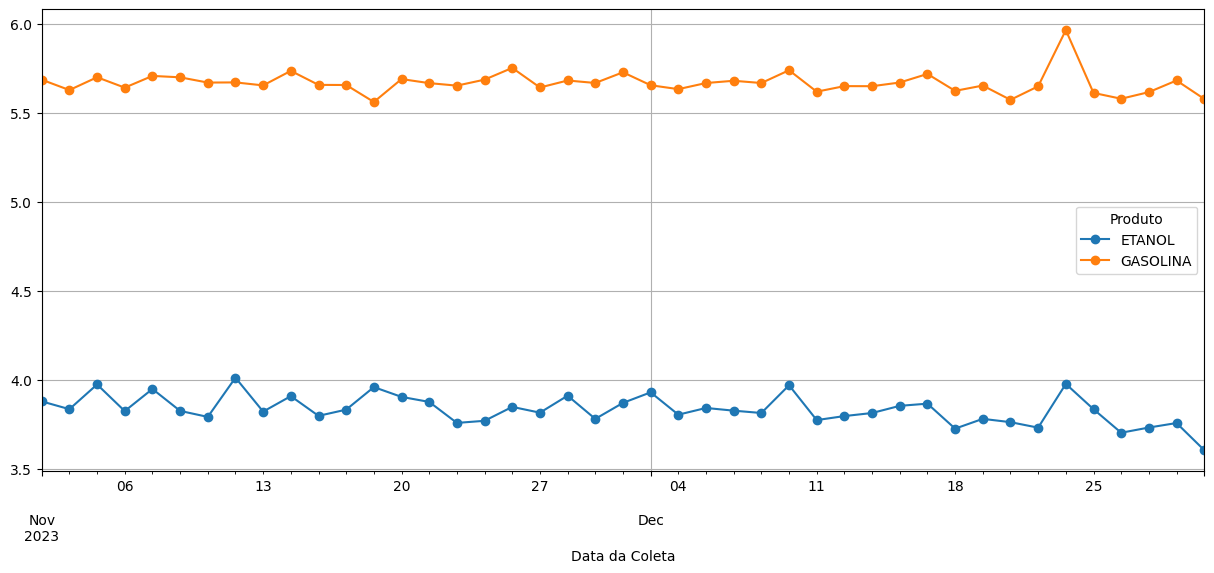

In [351]:
df1.T.plot(marker='o', grid = True, figsize=(15,6))

In [352]:
##### **Adcionando Médias**
media_etanol =df1.loc['ETANOL'].mean()
media_gas =df1.loc['GASOLINA'].mean()


In [353]:
# Tirando a prova real
print(df1.loc['ETANOL'].sum())
print(df1.loc['ETANOL'].count())

print(df1.loc['ETANOL'].sum()/df1.loc['ETANOL'].count())

164.84790158670222
43
3.8336721299233076


In [354]:
'''
# Adcionando ao dataframe original
df1.loc['Média Etanol'] = media_etanol
df1.loc['Média Gasolina'] = media_gas


#Criando dataframe
dfmedias1 = df1.loc[['Média Etanol', 'Média Gasolina']]

df1 = df1.drop(['Média Etanol', 'Média Gasolina'])

df1
'''

"\n# Adcionando ao dataframe original\ndf1.loc['Média Etanol'] = media_etanol\ndf1.loc['Média Gasolina'] = media_gas\n\n\n#Criando dataframe\ndfmedias1 = df1.loc[['Média Etanol', 'Média Gasolina']]\n\ndf1 = df1.drop(['Média Etanol', 'Média Gasolina'])\n\ndf1\n"

In [355]:
dfmedias1

Data da Coleta,2023-11-01,2023-11-02,2023-11-03,2023-11-06,2023-11-07,2023-11-08,2023-11-09,2023-11-10,2023-11-13,2023-11-14,...,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-25,2023-12-26,2023-12-27,2023-12-28,2023-12-29
Produto,,,,,,,,,,,,,,,,,,,,,
Média Etanol,3.833672,3.833672,3.833672,3.833672,3.833672,3.833672,3.833672,3.833672,3.833672,3.833672,...,3.833672,3.833672,3.833672,3.833672,3.833672,3.833672,3.833672,3.833672,3.833672,3.833672
Média Gasolina,5.668253,5.668253,5.668253,5.668253,5.668253,5.668253,5.668253,5.668253,5.668253,5.668253,...,5.668253,5.668253,5.668253,5.668253,5.668253,5.668253,5.668253,5.668253,5.668253,5.668253


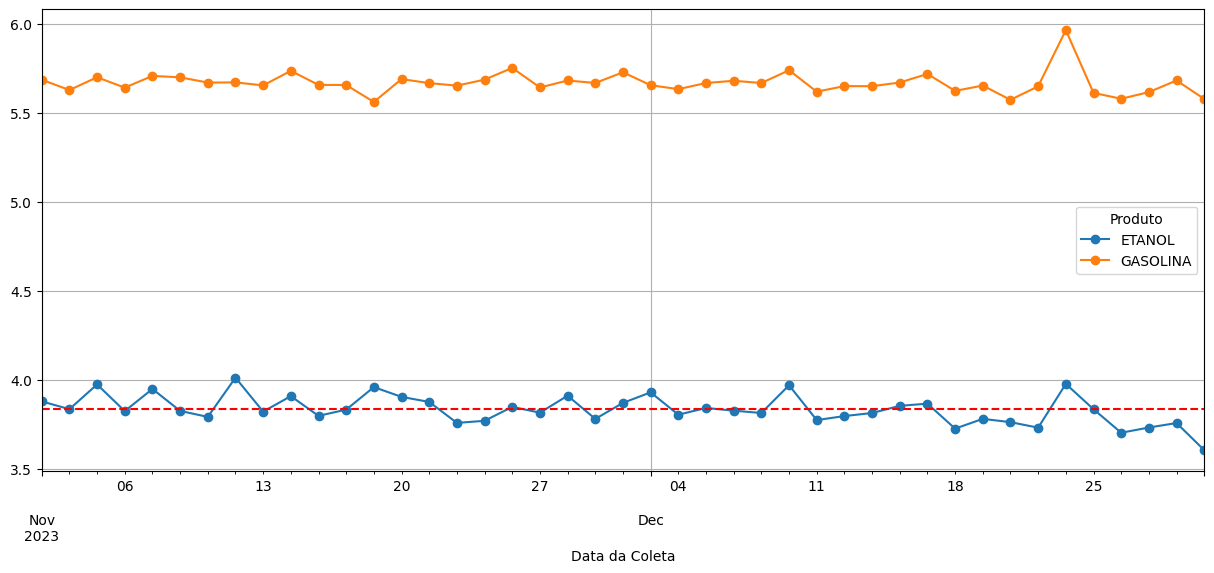

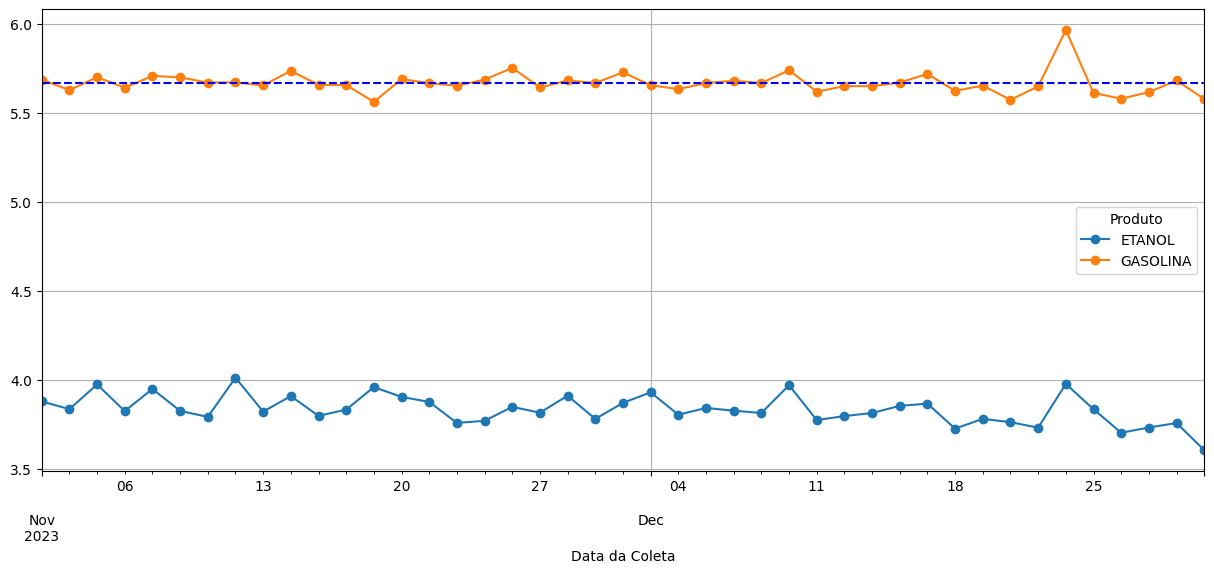

In [356]:
df1.T.plot(marker='o', grid = True, figsize=(15,6)).axhline(y=(media_etanol), color='red', linestyle='--')
df1.T.plot(marker='o', grid = True, figsize=(15,6)).axhline(y=(media_gas), color='blue', linestyle='--')

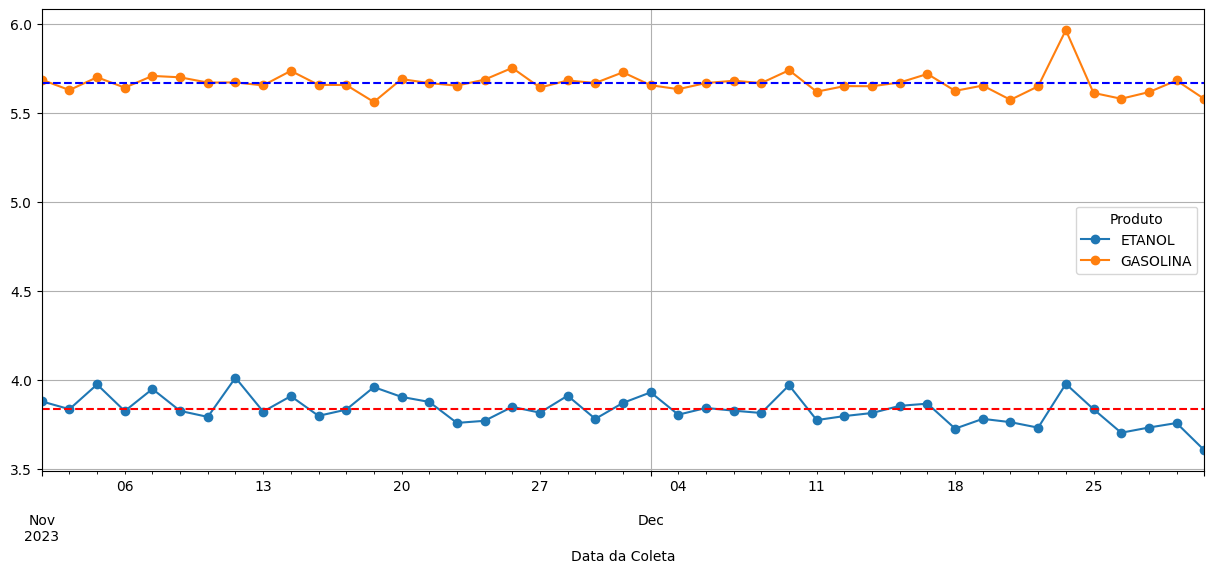

In [359]:
plot1 = df1.T.plot(marker='o', grid=True, figsize=(15,6))

plot1.axhline(y=media_etanol, color='red', linestyle='--', label='Média Etanol')
plot1.axhline(y=media_gas, color='blue', linestyle='--', label='Média Gasolina')


3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?
4. Qual o preço médio da gasolina e do etanol por estado?

5. Qual o município que possui o menor preço para a gasolina e para o etanol?
6. Qual o município que possui o maior preço para a gasolina e para o etanol?

7. Qual a região que possui o maior valor médio da gasolina?
8. Qual a região que possui o menor valor médio do etanol?

9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?
10.  Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?
Além disso, vocês deverão pensar em mais três perguntas que deverão ser respondidas por scripts.